# Importación de librerías y carga de datos

In [1]:
# Importación de librerías necesarias

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier

# Rutas donde cada persona tiene los df locales, de la carpeta de OneDrive
# Copiar la ruta como una variable y cambiar la varibale en el siguiente
# bloque de código.

path_santiago = r'C:\Users\santi\Universidad de Antioquia\VALERIA CADAVID CASTRO - Resultados_Armonizacion_BD'

In [2]:
# Se cargan los df

data_roi = pd.read_feather(r'{path}\Datosparaorganizardataframes\Data_complete_roi.feather'.format(path=path_santiago))
data_com = pd.read_feather(r'{path}\Datosparaorganizardataframes\Data_complete_ic.feather'.format(path=path_santiago))

In [3]:
data_roi.shape

(695, 396)

In [4]:
data_roi

,participant_id,group,visit,condition,power_F_Delta,power_C_Delta,power_PO_Delta,power_T_Delta,power_F_Theta,power_C_Theta,...,crossfreq_PO_Mbeta3_Gamma,crossfreq_PO_Mgamma_Gamma,crossfreq_T_Mdelta_Gamma,crossfreq_T_Mtheta_Gamma,crossfreq_T_Malpha-1_Gamma,crossfreq_T_Malpha-2_Gamma,crossfreq_T_Mbeta1_Gamma,crossfreq_T_Mbeta2_Gamma,crossfreq_T_Mbeta3_Gamma,crossfreq_T_Mgamma_Gamma
0,sub-001,Control,t1,resteyesc,0.189602,0.176659,0.101200,0.223827,0.066207,0.068513,...,0.168018,0.109982,89.140234,2.750575,0.414048,0.235265,0.286677,0.072954,0.098105,0.077196
1,sub-048,Control,t1,resteyesc,0.375694,0.288320,0.279237,0.143382,0.110032,0.106148,...,0.198484,0.228202,88.493464,2.869721,0.333480,0.176439,0.268310,0.070710,0.128754,0.174227
2,sub-032,Control,t2,resteyesc,0.109964,0.108311,0.068854,0.083404,0.232157,0.194845,...,0.132916,0.133881,79.727876,5.657763,0.769356,0.322866,0.381314,0.100357,0.177042,0.201132
3,sub-033,Control,t1,resteyesc,0.083578,0.103054,0.082122,0.094533,0.242587,0.249982,...,0.120825,0.086615,82.670584,4.803353,0.712749,0.353476,0.368726,0.097342,0.135079,0.099665
4,sub-034,Control,t1,resteyesc,0.216370,0.259794,0.169278,0.195440,0.102207,0.106738,...,0.105230,0.083918,88.670533,2.944692,0.347031,0.165686,0.244780,0.058153,0.124275,0.161687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,sub-CBM00142,Control,V0,protmap,0.200106,0.155914,0.133299,0.181092,0.072175,0.077957,...,0.148937,0.095100,88.616950,2.405921,0.454529,0.303030,0.374266,0.094186,0.124265,0.086150
691,sub-CBM00139,Control,V0,protmap,0.235616,0.213218,0.141323,0.267869,0.056001,0.065528,...,0.118125,0.079648,90.610515,2.671015,0.317979,0.167589,0.231405,0.055597,0.075149,0.050814
692,sub-CBM00181,Control,V0,protmap,0.320241,0.220400,0.227733,0.235943,0.133897,0.115115,...,0.102473,0.060939,90.251077,2.492620,0.327342,0.158792,0.283149,0.072093,0.105446,0.070008
693,sub-CBM00283,Control,V0,protmap,0.297278,0.181701,0.121155,0.188995,0.094440,0.073409,...,0.117141,0.082861,88.536266,2.627921,0.353599,0.261705,0.409050,0.087332,0.123650,0.083185


In [5]:
data_com.shape

(693, 2276)

In [6]:
data_com

,participant_id,visit,group,condition,database,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,power_C14_Beta1,...,crossfreq_C24_Mbeta3_Gamma,crossfreq_C24_Mgamma_Gamma,crossfreq_C25_Mdelta_Gamma,crossfreq_C25_Mtheta_Gamma,crossfreq_C25_Malpha-1_Gamma,crossfreq_C25_Malpha-2_Gamma,crossfreq_C25_Mbeta1_Gamma,crossfreq_C25_Mbeta2_Gamma,crossfreq_C25_Mbeta3_Gamma,crossfreq_C25_Mgamma_Gamma
0,sub-001,t1,Control,resteyesc,SRM,0.327104,0.090290,0.095894,0.171136,0.116639,...,0.046110,0.130110,0.137692,0.061519,0.298151,0.349850,0.150058,0.019943,0.085524,0.159833
1,sub-048,t1,Control,resteyesc,SRM,0.247386,0.071738,0.066750,0.059420,0.141935,...,0.054412,0.331761,0.124378,0.018468,0.013594,0.017734,0.025123,0.006607,0.036793,0.145007
2,sub-032,t2,Control,resteyesc,SRM,0.140841,0.106433,0.186905,0.049452,0.159093,...,0.073536,0.345448,0.056579,0.195908,0.310995,0.118157,0.034652,0.016495,0.046300,0.145798
3,sub-033,t1,Control,resteyesc,SRM,0.157902,0.154305,0.267533,0.064889,0.145734,...,0.057309,0.159613,0.074133,0.072748,0.166182,0.080233,0.062531,0.019376,0.042643,0.102436
4,sub-034,t1,Control,resteyesc,SRM,0.346331,0.085229,0.076336,0.071917,0.131478,...,0.069607,0.375366,0.138356,0.028879,0.059957,0.082952,0.058469,0.011121,0.036483,0.136901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,sub-CBM00142,V0,Control,protmap,CHBMP,0.129311,0.056886,0.243857,0.346875,0.094494,...,0.065837,0.085042,0.106283,0.074464,0.184053,0.147773,0.041632,0.008653,0.080759,0.048921
689,sub-CBM00139,V0,Control,protmap,CHBMP,0.326392,0.095466,0.103793,0.219377,0.095150,...,0.030620,0.053995,0.133685,0.031298,0.077809,0.091993,0.067116,0.012603,0.038585,0.050885
690,sub-CBM00181,V0,Control,protmap,CHBMP,0.156019,0.093890,0.106951,0.118123,0.238013,...,0.124776,0.256343,0.082982,0.029091,0.023285,0.023307,0.060876,0.020677,0.053764,0.085696
691,sub-CBM00283,V0,Control,protmap,CHBMP,0.257382,0.072319,0.162746,0.282953,0.124002,...,0.037085,0.049992,0.128109,0.050709,0.164024,0.275433,0.171037,0.014025,0.041827,0.043977


# Preprocesamiento (diferentes pipelines de preprocesamiento)

In [7]:
# Se visualizan cuantos datos pertenecen a la categoría DCL en cada df
# para su posterior eliminación, puesto que no se utilizarán en el proceso
# de entrenamiento de los modelos de clasificación.

print((data_roi['group']=='DCL').sum())
print((data_com['group']=='DCL').sum())

48
47


In [8]:
# Se quitan los grupos que no van en el clafisicador (targets)

data_roi.drop(data_roi[data_roi.group == 'DCL'].index, inplace=True)
data_com.drop(data_com[data_com.group == 'DCL'].index, inplace=True)

In [9]:
# Se rectifican el número de sujetos que quedan tras el filtrado

print(data_roi.shape)
print(data_com.shape)

(647, 396)
(646, 2276)


# Análisis exploratorio de datos

Para todas las caracteristicas

In [10]:
statistics_roi = data_roi.describe()
statistics_com = data_com.describe()

Se selecciona, por ejemplo, potencias

In [11]:
# Se extraen las potencias  en ambos datasets
# (filtrando columnas que contengan la palabra 'power' en su nombre).

power_data_roi = data_roi.filter(regex='power')

# Se añade la columna de grupo
# la cual corresponde al target en la clasificación

power_data_roi.loc[:,'group'] = data_roi.loc[:,'group']

# Mismo procedimiento para el df de componentes

power_data_com = data_com.filter(regex='power')
power_data_com.loc[:,'group'] = data_com.loc[:,'group']

C:\Users\santi\AppData\Local\Temp\ipykernel_13256\3093017183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_roi.loc[:,'group'] = data_roi.loc[:,'group']
C:\Users\santi\AppData\Local\Temp\ipykernel_13256\3093017183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_com.loc[:,'group'] = data_com.loc[:,'group']


In [12]:
statistics_roi_pwr = power_data_roi.describe()
statistics_com_pwr = power_data_com.describe()

## Pipeline de potencias multiclase (preprocesamiento)

In [14]:
# Se extraen las potencias  en ambos datasets
# (filtrando columnas que contengan la palabra 'power' en su nombre).

power_data_roi = data_roi.filter(regex='power')

# Se añade la columna de grupo
# la cual corresponde al target en la clasificación

power_data_roi.loc[:,'group'] = data_roi.loc[:,'group']

# Mismo procedimiento para el df de componentes

power_data_com = data_com.filter(regex='power')
power_data_com.loc[:,'group'] = data_com.loc[:,'group']


C:\Users\santi\AppData\Local\Temp\ipykernel_13256\2914807203.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_roi.loc[:,'group'] = data_roi.loc[:,'group']
C:\Users\santi\AppData\Local\Temp\ipykernel_13256\2914807203.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_com.loc[:,'group'] = data_com.loc[:,'group']


In [15]:
# Verificación de que las etiquetas hayan quedado en la posición de que debe
# ser utilizando la igualdad elemento a elemento.
print((power_data_roi['group'] != data_roi['group']).sum())
print((power_data_com['group'] != data_com['group']).sum())

0
0


In [16]:
power_data_roi

,power_F_Delta,power_C_Delta,power_PO_Delta,power_T_Delta,power_F_Theta,power_C_Theta,power_PO_Theta,power_T_Theta,power_F_Alpha-1,power_C_Alpha-1,...,power_T_Beta2,power_F_Beta3,power_C_Beta3,power_PO_Beta3,power_T_Beta3,power_F_Gamma,power_C_Gamma,power_PO_Gamma,power_T_Gamma,group
0,0.189602,0.176659,0.101200,0.223827,0.066207,0.068513,0.056224,0.087097,0.276828,0.285323,...,0.034790,0.057521,0.057246,0.043501,0.081341,0.035356,0.020914,0.013962,0.037231,Control
1,0.375694,0.288320,0.279237,0.143382,0.110032,0.106148,0.093774,0.064500,0.113129,0.114430,...,0.046153,0.098691,0.134979,0.120603,0.152258,0.074722,0.094784,0.094766,0.198513,Control
2,0.109964,0.108311,0.068854,0.083404,0.232157,0.194845,0.228018,0.114874,0.362355,0.347684,...,0.070064,0.080207,0.085837,0.052132,0.152723,0.056413,0.059504,0.043838,0.179326,Control
3,0.083578,0.103054,0.082122,0.094533,0.242587,0.249982,0.249030,0.269792,0.385234,0.355509,...,0.029102,0.044424,0.063733,0.029013,0.051463,0.030189,0.025021,0.016097,0.053606,Control
4,0.216370,0.259794,0.169278,0.195440,0.102207,0.106738,0.104244,0.093252,0.184423,0.234110,...,0.031409,0.092634,0.057411,0.049655,0.076847,0.127726,0.057284,0.055487,0.106771,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0.200106,0.155914,0.133299,0.181092,0.072175,0.077957,0.082671,0.088941,0.532705,0.480018,...,0.025289,0.027210,0.029588,0.018004,0.049415,0.020396,0.040166,0.014038,0.040012,Control
691,0.235616,0.213218,0.141323,0.267869,0.056001,0.065528,0.044335,0.080121,0.186176,0.185862,...,0.030539,0.035807,0.038972,0.032115,0.062086,0.024705,0.017078,0.012923,0.036413,Control
692,0.320241,0.220400,0.227733,0.235943,0.133897,0.115115,0.124916,0.108519,0.118561,0.133310,...,0.064260,0.096487,0.117928,0.101108,0.111628,0.033646,0.024477,0.035566,0.056424,Control
693,0.297278,0.181701,0.121155,0.188995,0.094440,0.073409,0.069815,0.083760,0.184525,0.265666,...,0.029774,0.042324,0.032036,0.030495,0.051669,0.024359,0.016696,0.013949,0.040938,Control


In [17]:
power_data_com

,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,power_C14_Beta1,power_C14_Beta2,power_C14_Beta3,power_C14_Gamma,power_C15_Delta,power_C15_Theta,...,power_C24_Gamma,power_C25_Delta,power_C25_Theta,power_C25_Alpha-1,power_C25_Alpha-2,power_C25_Beta1,power_C25_Beta2,power_C25_Beta3,power_C25_Gamma,group
0,0.327104,0.090290,0.095894,0.171136,0.116639,0.031024,0.100370,0.067543,0.412928,0.121229,...,0.013167,0.092124,0.056419,0.354509,0.338190,0.077824,0.024582,0.042012,0.014342,Control
1,0.247386,0.071738,0.066750,0.059420,0.141935,0.047338,0.175262,0.190171,0.335093,0.099891,...,0.119121,0.415142,0.098463,0.065848,0.072560,0.149561,0.042183,0.091376,0.064866,Control
2,0.140841,0.106433,0.186905,0.049452,0.159093,0.105669,0.149959,0.101647,0.278358,0.154533,...,0.043151,0.085588,0.179970,0.575251,0.040625,0.058975,0.018758,0.023623,0.017210,Control
3,0.157902,0.154305,0.267533,0.064889,0.145734,0.069127,0.098994,0.041517,0.163492,0.145038,...,0.020211,0.100673,0.145661,0.469200,0.106960,0.079745,0.059673,0.026306,0.011782,Control
4,0.346331,0.085229,0.076336,0.071917,0.131478,0.045022,0.111403,0.132283,0.424508,0.109717,...,0.103555,0.245195,0.088844,0.208786,0.228378,0.120503,0.021160,0.045526,0.041608,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,0.129311,0.056886,0.243857,0.346875,0.094494,0.023124,0.066560,0.038894,0.189479,0.048154,...,0.019293,0.121643,0.061784,0.627194,0.101736,0.033033,0.009645,0.016506,0.028458,Control
689,0.326392,0.095466,0.103793,0.219377,0.095150,0.040168,0.078880,0.040773,0.305733,0.092093,...,0.025071,0.193927,0.055548,0.185792,0.387611,0.096916,0.024525,0.039829,0.015850,Control
690,0.156019,0.093890,0.106951,0.118123,0.238013,0.106075,0.143480,0.037450,0.206543,0.107220,...,0.079751,0.262242,0.116653,0.109654,0.151588,0.149811,0.062408,0.110621,0.037022,Control
691,0.257382,0.072319,0.162746,0.282953,0.124002,0.023593,0.048525,0.028480,0.481628,0.137638,...,0.010511,0.117754,0.059860,0.207606,0.423183,0.135817,0.017241,0.028568,0.009970,Control


In [18]:
# Se realiza un mapeo de clases donde se asigna una etiqueta númerica 
# a cada clase (desde 0 hasta 3)

clases_mapeadas = {label:idx for idx,label in enumerate(np.unique(power_data_roi['group']))}
print(clases_mapeadas)

# Por verificación, se hace igualmente para el dataset de componentes

clases_mapeadas = {label:idx for idx,label in enumerate(np.unique(power_data_com['group']))}
print(clases_mapeadas)

{'Control': 0, 'DTA': 1, 'G1': 2, 'G2': 3}
{'Control': 0, 'DTA': 1, 'G1': 2, 'G2': 3}


In [19]:
# Se realiza el mapeo de las clases 

power_data_roi.loc[:,'group'] = power_data_roi.loc[:,'group'].map(clases_mapeadas) 
power_data_com.loc[:,'group'] = power_data_com.loc[:,'group'].map(clases_mapeadas)

C:\Users\santi\AppData\Local\Temp\ipykernel_13256\999636950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_roi.loc[:,'group'] = power_data_roi.loc[:,'group'].map(clases_mapeadas)
C:\Users\santi\AppData\Local\Temp\ipykernel_13256\999636950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_com.loc[:,'group'] = power_data_com.loc[:,'group'].map(clases_mapeadas)


In [20]:
print(power_data_roi['group'].unique())
print(power_data_com['group'].unique())

[0 1 2 3]
[0 1 2 3]


## Pipeline de potencias para clasificación binaria (preprocesamiento)

In [21]:
# Se separán los df entre ctr vs dta y g1 vs g2

# Las etiquetas 0 y 1 correponden a controles y DTA respectivamente
power_data_roi_ctr_dta = power_data_roi.loc[power_data_roi['group'] < 2]
power_data_com_ctr_dta = power_data_com.loc[power_data_com['group'] < 2]

# Las etiquetas 2 y 3 corresponden a g1 y g2 respectivamente
power_data_roi_g1_g2 = power_data_roi.loc[power_data_roi['group'] >= 2]
power_data_com_g1_g2 = power_data_com.loc[power_data_com['group'] >= 2]

In [22]:
print(power_data_roi_ctr_dta['group'].unique())
print(power_data_roi_g1_g2['group'].unique())
print('--')
print(power_data_com_ctr_dta['group'].unique())
print(power_data_com_g1_g2['group'].unique())

[0 1]
[2 3]
--
[0 1]
[2 3]


## Pipeline para el uso de todas las caracteristicas

## Identificación de caracteristicas de relevancia a través de árboles de decisión   (para potencias)

Se realizó el procedimiento para ROI'S

In [43]:
nombres_columnas = power_data_roi.columns[:-1]

In [44]:
X_train_roi, X_test_roi, y_train_roi, y_test_roi = train_test_split(
    power_data_roi.values[:,:-1],
    power_data_roi.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=power_data_roi.values[:,-1])

In [45]:
forestclf = RandomForestClassifier(n_estimators=500,
    random_state=1)

 1) power_PO_Beta1                 0.051324
 2) power_F_Gamma                  0.045785
 3) power_C_Beta1                  0.040389
 4) power_F_Beta1                  0.039510
 5) power_T_Beta1                  0.038995
 6) power_C_Gamma                  0.037418
 7) power_PO_Delta                 0.035140
 8) power_T_Gamma                  0.034092
 9) power_PO_Gamma                 0.033428
10) power_PO_Theta                 0.032776
11) power_T_Delta                  0.032561
12) power_PO_Alpha-2               0.030935
13) power_T_Beta2                  0.030518
14) power_F_Delta                  0.030308
15) power_F_Beta3                  0.030058
16) power_PO_Alpha-1               0.030040
17) power_PO_Beta2                 0.028537
18) power_C_Theta                  0.028029
19) power_C_Delta                  0.027946
20) power_F_Beta2                  0.027655
21) power_C_Beta3                  0.027453
22) power_C_Alpha-1                0.027214
23) power_T_Theta               

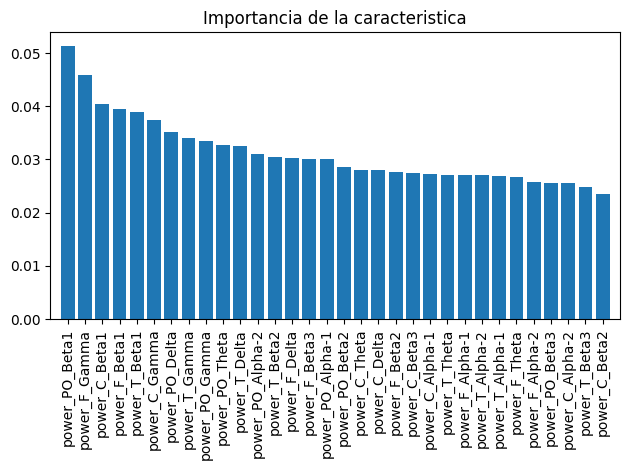

In [46]:
forestclf.fit(X_train_roi, y_train_roi)
features_scores = forestclf.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]


for f in range(X_train_roi.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))

plt.title('Importancia de la caracteristica')

plt.bar(range(X_train_roi.shape[1]),
    features_scores[index],
    align='center')

plt.xticks(range(X_train_roi.shape[1]),
    nombres_columnas[index],
    rotation=90)

plt.xlim([-1, X_train_roi.shape[1]])

plt.tight_layout()

plt.show()

Se relizó el procedimiento para componentes

In [47]:
nombres_columnas = power_data_com.columns[:-1]

In [48]:
X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(
    power_data_com.values[:,:-1],
    power_data_com.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=power_data_com.values[:,-1])

 1) power_C18_Beta1                0.035317
 2) power_C14_Delta                0.031602
 3) power_C23_Beta1                0.030853
 4) power_C25_Beta1                0.029509
 5) power_C22_Beta1                0.029118
 6) power_C14_Beta1                0.023691
 7) power_C14_Beta3                0.022236
 8) power_C14_Gamma                0.021063
 9) power_C20_Delta                0.021058
10) power_C20_Beta2                0.020676
11) power_C20_Beta1                0.020421
12) power_C25_Theta                0.019721
13) power_C23_Alpha-2              0.018945
14) power_C25_Delta                0.018307
15) power_C15_Theta                0.018300
16) power_C18_Beta2                0.018254
17) power_C22_Delta                0.018241
18) power_C14_Beta2                0.016059
19) power_C22_Theta                0.015904
20) power_C22_Alpha-2              0.015713
21) power_C15_Alpha-2              0.015545
22) power_C24_Beta1                0.015285
23) power_C24_Alpha-2           

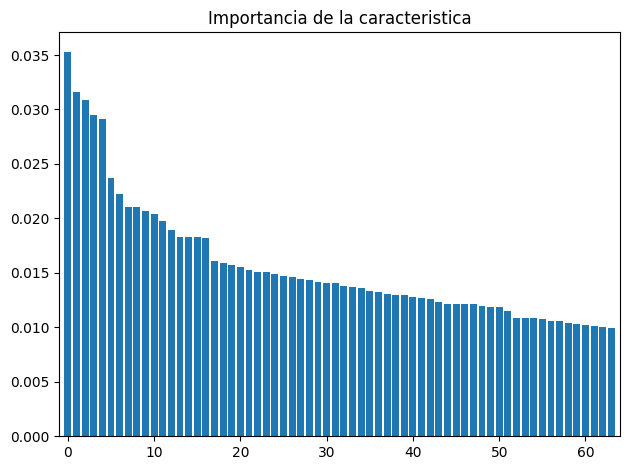

In [50]:
forestclf.fit(X_train_com, y_train_com)
features_scores = forestclf.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]


for f in range(X_train_com.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))

plt.title('Importancia de la caracteristica')

plt.bar(range(X_train_com.shape[1]),
    features_scores[index],
    align='center')

#plt.xticks(range(X_train_com.shape[1]),
#    nombres_columnas[index],
#    rotation=90)

plt.xlim([-1, X_train_com.shape[1]])

plt.tight_layout()

plt.show()

Se busca hacer una validación para ver si en los datasets de clasificación
binaria, son las mismas carcateristicas las que siguen predominando.
Inicialmente, se prueban los datasets Controles Vs. DTA

In [51]:
nombres_columnas = power_data_roi_ctr_dta.columns[:-1]

In [52]:
X_train_roi_ctr_dta, X_test_roi_ctr_dta, y_train_roi_ctr_dta, y_test_roi_ctr_dta = train_test_split(
    power_data_roi_ctr_dta.values[:,:-1],
    power_data_roi_ctr_dta.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=power_data_roi_ctr_dta.values[:,-1])

 1) power_PO_Theta                 0.076974
 2) power_C_Theta                  0.069400
 3) power_F_Gamma                  0.050885
 4) power_T_Theta                  0.050135
 5) power_F_Theta                  0.046348
 6) power_PO_Alpha-1               0.043298
 7) power_T_Alpha-2                0.041352
 8) power_C_Alpha-1                0.038895
 9) power_PO_Delta                 0.038812
10) power_C_Gamma                  0.034363
11) power_T_Gamma                  0.033375
12) power_T_Alpha-1                0.032256
13) power_F_Beta1                  0.031986
14) power_PO_Beta2                 0.031504
15) power_F_Alpha-1                0.029101
16) power_C_Beta1                  0.027113
17) power_C_Alpha-2                0.024661
18) power_F_Alpha-2                0.024195
19) power_PO_Beta1                 0.022976
20) power_F_Beta2                  0.022430
21) power_T_Beta2                  0.022051
22) power_PO_Alpha-2               0.021697
23) power_T_Delta               

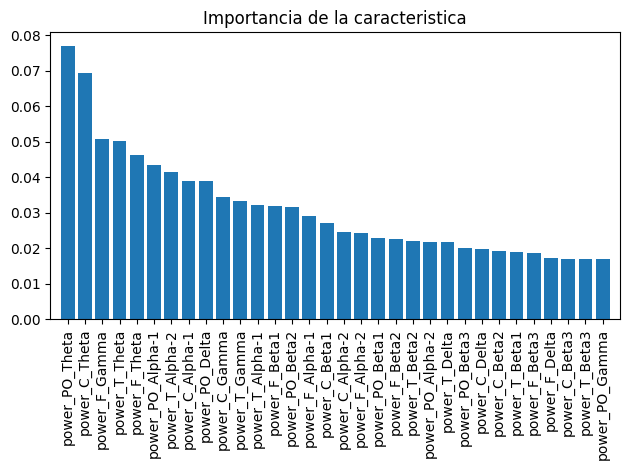

In [53]:
forestclf.fit(X_train_roi_ctr_dta, y_train_roi_ctr_dta)
features_scores = forestclf.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]


for f in range(X_train_roi_ctr_dta.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))

plt.title('Importancia de la caracteristica')

plt.bar(range(X_train_roi_ctr_dta.shape[1]),
    features_scores[index],
    align='center')

plt.xticks(range(X_train_roi_ctr_dta.shape[1]),
    nombres_columnas[index],
    rotation=90)

plt.xlim([-1, X_train_roi_ctr_dta.shape[1]])

plt.tight_layout()

plt.show()

In [54]:
nombres_columnas = power_data_com_ctr_dta.columns[:-1]

In [55]:
X_train_com_ctr_dta, X_test_com_ctr_dta, y_train_com_ctr_dta, y_test_com_ctr_dta = train_test_split(
    power_data_com_ctr_dta.values[:,:-1],
    power_data_com_ctr_dta.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=power_data_com_ctr_dta.values[:,-1])

 1) power_C22_Theta                0.067052
 2) power_C25_Theta                0.033183
 3) power_C25_Gamma                0.032088
 4) power_C24_Gamma                0.028580
 5) power_C15_Gamma                0.028125
 6) power_C14_Gamma                0.027557
 7) power_C14_Theta                0.026336
 8) power_C20_Theta                0.025771
 9) power_C24_Theta                0.025585
10) power_C14_Alpha-2              0.025436
11) power_C18_Theta                0.025194
12) power_C24_Alpha-2              0.022936
13) power_C22_Beta2                0.020824
14) power_C24_Alpha-1              0.020552
15) power_C25_Alpha-1              0.018670
16) power_C15_Delta                0.018373
17) power_C25_Delta                0.017881
18) power_C20_Beta2                0.017710
19) power_C22_Alpha-1              0.016831
20) power_C22_Alpha-2              0.016791
21) power_C18_Gamma                0.016633
22) power_C14_Beta3                0.016363
23) power_C25_Beta1             

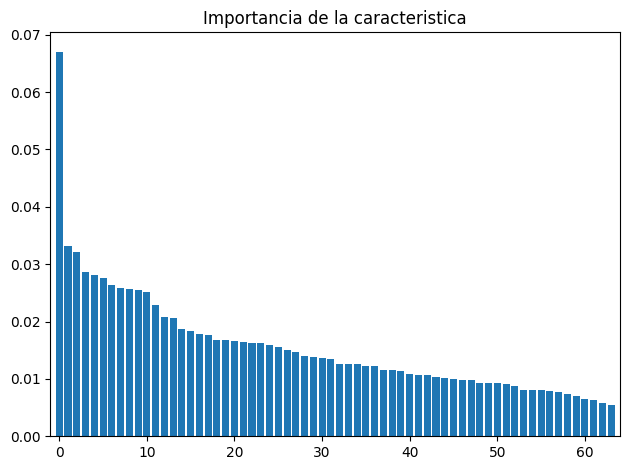

In [56]:
forestclf.fit(X_train_com_ctr_dta, y_train_com_ctr_dta)
features_scores = forestclf.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]


for f in range(X_train_com_ctr_dta.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))

plt.title('Importancia de la caracteristica')

plt.bar(range(X_train_com_ctr_dta.shape[1]),
    features_scores[index],
    align='center')

#plt.xticks(range(X_train_com_ctr_dta.shape[1]),
#    nombres_columnas[index],
#    rotation=90)

plt.xlim([-1, X_train_com_ctr_dta.shape[1]])

plt.tight_layout()

plt.show()

Para G1 VS. G2

In [57]:
nombres_columnas = power_data_roi_g1_g2.columns[:-1]

In [58]:
X_train_roi_g1_g2, X_test_roi_g1_g2, y_train_roi_g1_g2, y_test_roi_g1_g2 = train_test_split(
    power_data_roi_g1_g2.values[:,:-1],
    power_data_roi_g1_g2.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=power_data_roi_g1_g2.values[:,-1])

 1) power_PO_Beta1                 0.054699
 2) power_C_Beta3                  0.045174
 3) power_PO_Alpha-1               0.040855
 4) power_C_Beta1                  0.036617
 5) power_C_Alpha-2                0.034443
 6) power_F_Beta1                  0.034214
 7) power_C_Gamma                  0.034159
 8) power_F_Beta3                  0.033803
 9) power_PO_Theta                 0.033026
10) power_T_Theta                  0.032969
11) power_T_Beta1                  0.032421
12) power_F_Alpha-1                0.031856
13) power_F_Gamma                  0.031646
14) power_PO_Alpha-2               0.031541
15) power_PO_Delta                 0.030597
16) power_C_Alpha-1                0.030403
17) power_T_Delta                  0.029507
18) power_PO_Gamma                 0.028811
19) power_C_Delta                  0.028756
20) power_T_Alpha-1                0.028699
21) power_F_Alpha-2                0.028656
22) power_PO_Beta2                 0.028401
23) power_T_Gamma               

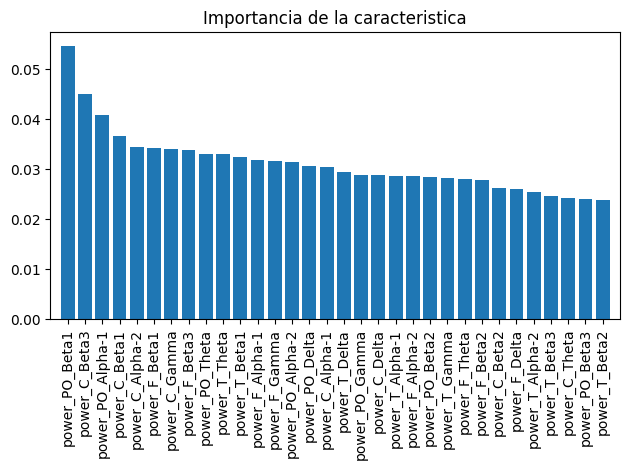

In [60]:
forestclf.fit(X_train_roi_g1_g2, y_train_roi_g1_g2)
features_scores = forestclf.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]


for f in range(X_train_roi_g1_g2.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))

plt.title('Importancia de la caracteristica')

plt.bar(range(X_train_roi_g1_g2.shape[1]),
    features_scores[index],
    align='center')

plt.xticks(range(X_train_roi_g1_g2.shape[1]),
    nombres_columnas[index],
    rotation=90)

plt.xlim([-1, X_train_roi_g1_g2.shape[1]])

plt.tight_layout()

plt.show()

In [61]:
nombres_columnas = power_data_com_g1_g2.columns[:-1]

In [62]:
X_train_com_g1_g2, X_test_com_g1_g2, y_train_com_g1_g2, y_test_com_g1_g2 = train_test_split(
    power_data_com_g1_g2.values[:,:-1],
    power_data_com_g1_g2.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=power_data_com_g1_g2.values[:,-1])

 1) power_C23_Beta1                0.046267
 2) power_C15_Beta3                0.032896
 3) power_C14_Beta3                0.027483
 4) power_C24_Beta1                0.026866
 5) power_C23_Alpha-2              0.026188
 6) power_C22_Delta                0.023423
 7) power_C25_Delta                0.021487
 8) power_C18_Beta3                0.021306
 9) power_C23_Delta                0.019663
10) power_C24_Gamma                0.019196
11) power_C23_Gamma                0.018792
12) power_C24_Theta                0.018559
13) power_C23_Beta2                0.018362
14) power_C24_Alpha-1              0.018206
15) power_C14_Beta1                0.017937
16) power_C18_Gamma                0.017628
17) power_C18_Beta2                0.017543
18) power_C15_Alpha-2              0.016757
19) power_C24_Alpha-2              0.016670
20) power_C20_Delta                0.016224
21) power_C23_Alpha-1              0.016123
22) power_C18_Beta1                0.015531
23) power_C22_Beta3             

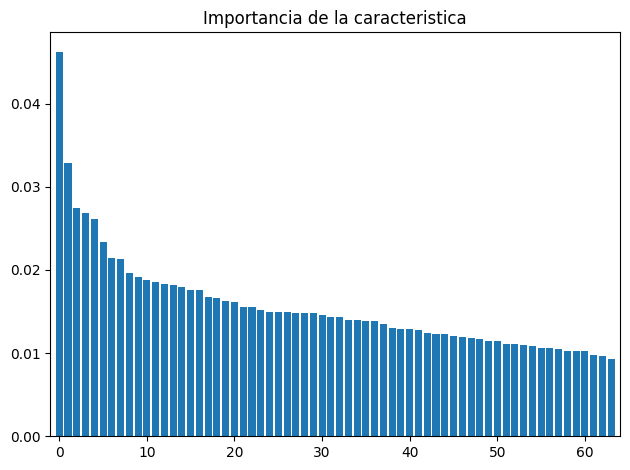

In [63]:
forestclf.fit(X_train_com_g1_g2, y_train_com_g1_g2)
features_scores = forestclf.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]


for f in range(X_train_com_g1_g2.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))

plt.title('Importancia de la caracteristica')

plt.bar(range(X_train_com_g1_g2.shape[1]),
    features_scores[index],
    align='center')

#plt.xticks(range(X_train_com_ctr_dta.shape[1]),
#    nombres_columnas[index],
#    rotation=90)

plt.xlim([-1, X_train_com_g1_g2.shape[1]])

plt.tight_layout()

plt.show()

# Entrenamiento de máquinas de soporte vectorial (potencias)

## Maquinas de soporte vectorial de clasificación multiclase

In [64]:
supvm = SVC(C=10, random_state=1)

In [65]:
supvm.fit(X_train_roi, y_train_roi)

SVC(C=10, random_state=1)

In [66]:
predicted = supvm.predict(X_test_roi)

In [67]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_roi, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84        71
         1.0       1.00      0.80      0.89         5
         2.0       0.61      0.56      0.58        25
         3.0       0.79      0.38      0.51        29

    accuracy                           0.74       130
   macro avg       0.79      0.67      0.71       130
weighted avg       0.74      0.74      0.72       130




Confusion matrix:
[[67  0  3  1]
 [ 1  4  0  0]
 [ 9  0 14  2]
 [12  0  6 11]]


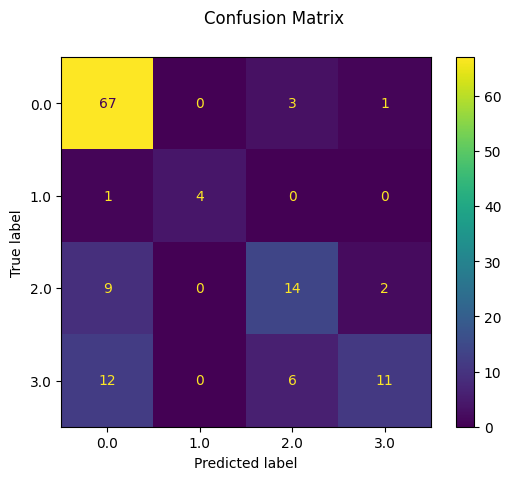

In [68]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_roi, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [69]:
supvm.fit(X_train_com, y_train_com)

SVC(C=10, random_state=1)

In [70]:
predicted = supvm.predict(X_test_com)

In [71]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_com, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.82        70
         1.0       0.67      0.33      0.44         6
         2.0       0.68      0.52      0.59        25
         3.0       0.67      0.62      0.64        29

    accuracy                           0.73       130
   macro avg       0.70      0.59      0.62       130
weighted avg       0.72      0.73      0.72       130




Confusion matrix:
[[62  0  4  4]
 [ 3  2  0  1]
 [ 8  0 13  4]
 [ 8  1  2 18]]


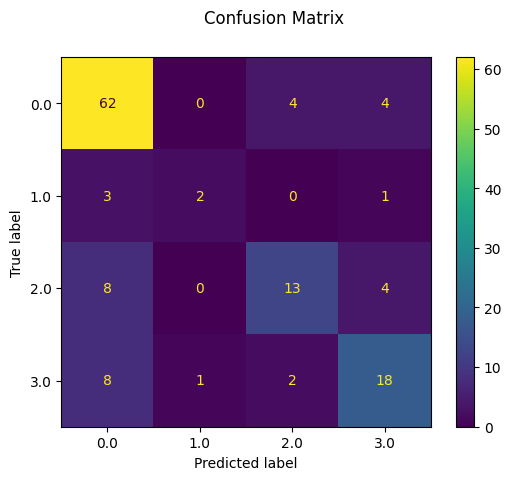

In [72]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_com, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Maquinas de soporte vectorial de clasificación binaria

### Controles vs. DTA

In [49]:
supvm.fit(X_train_roi_ctr_dta, y_train_roi_ctr_dta)

SVC(C=10, random_state=1)

In [50]:
predicted = supvm.predict(X_test_roi_ctr_dta)

In [51]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_roi_ctr_dta, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        71
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76




Confusion matrix:
[[71  0]
 [ 0  5]]


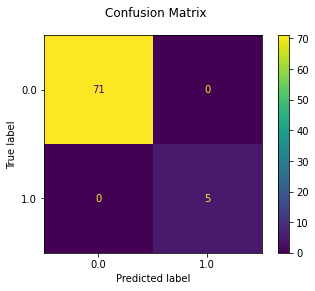

In [52]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_roi_ctr_dta, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [53]:
supvm.fit(X_train_com_ctr_dta, y_train_com_ctr_dta)

SVC(C=10, random_state=1)

In [54]:
predicted = supvm.predict(X_test_com_ctr_dta)

In [55]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_com_ctr_dta, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        70
         1.0       0.57      0.67      0.62         6

    accuracy                           0.93        76
   macro avg       0.77      0.81      0.79        76
weighted avg       0.94      0.93      0.94        76




Confusion matrix:
[[67  3]
 [ 2  4]]


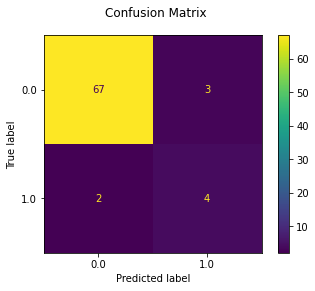

In [56]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_com_ctr_dta, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### G1 vs. G2

In [57]:
supvm.fit(X_train_roi_g1_g2, y_train_roi_g1_g2)

SVC(C=10, random_state=1)

In [58]:
predicted = supvm.predict(X_test_roi_g1_g2)

In [59]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_roi_g1_g2, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         2.0       0.78      0.72      0.75        25
         3.0       0.77      0.83      0.80        29

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54




Confusion matrix:
[[18  7]
 [ 5 24]]


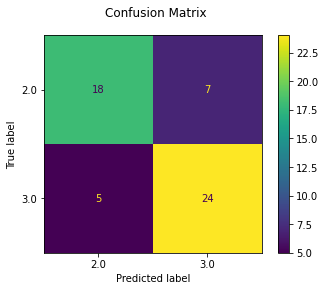

In [60]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_roi_g1_g2, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [61]:
supvm.fit(X_train_com_g1_g2, y_train_com_g1_g2)

SVC(C=10, random_state=1)

In [62]:
predicted = supvm.predict(X_test_com_g1_g2)

In [63]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_com_g1_g2, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         2.0       0.73      0.88      0.80        25
         3.0       0.88      0.72      0.79        29

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.81      0.80      0.80        54




Confusion matrix:
[[22  3]
 [ 8 21]]


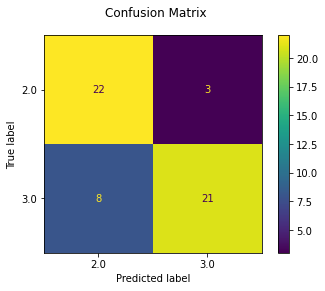

In [64]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_com_g1_g2, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [8]:
# Netrenamiento con todas las caracteristicas númericas

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_roi_allf = data_roi.select_dtypes(include=numerics)

data_com_allf = data_com.select_dtypes(include=numerics)

In [9]:
data_roi_allf['group'] = data_roi['group']
data_com_allf['group'] = data_com['group']

In [10]:
data_roi_allf['group'] =data_roi_allf['group'].map(clases_mapeadas) 
data_com_allf['group'] = data_com_allf['group'].map(clases_mapeadas)

In [13]:
X_train_roiall, X_test_roiall, y_train_roiall, y_test_roiall = train_test_split(
    data_roi_allf.values[:,:-1],
    data_roi_allf.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=data_roi_allf.values[:,-1])

In [14]:
supvm = SVC(C=10, random_state=1)

In [49]:
np.where(np.isnan(X_train_roiall))

(array([  0,   0,   0,   3,   3,   3,   5,   5,   6,   6,   9,   9,   9,
         12,  12,  12,  13,  13,  15,  15,  15,  16,  16,  16,  18,  18,
         18,  19,  19,  19,  20,  20,  20,  21,  21,  22,  22,  22,  27,
         27,  27,  29,  29,  29,  31,  31,  31,  33,  33,  33,  34,  34,
         34,  35,  35,  35,  37,  37,  37,  38,  38,  40,  40,  40,  41,
         41,  42,  42,  42,  43,  43,  43,  44,  44,  44,  45,  45,  48,
         48,  48,  49,  49,  49,  50,  50,  50,  52,  52,  52,  53,  53,
         53,  55,  55,  55,  56,  56,  56,  58,  58,  62,  62,  62,  64,
         64,  65,  65,  65,  66,  66,  67,  67,  69,  69,  69,  71,  71,
         72,  72,  72,  73,  73,  73,  75,  75,  75,  77,  77,  79,  79,
         79,  82,  82,  83,  83,  83,  85,  85,  85,  86,  86,  86,  91,
         91,  92,  92,  92,  95,  95,  95,  96,  96,  97,  97,  97,  98,
         98,  98,  99,  99,  99, 100, 100, 100, 101, 101, 102, 102, 102,
        103, 103, 103, 104, 104, 105, 105, 105, 109

In [57]:
X_train_roiall=np.nan_to_num(X_train_roiall)
X_test_roiall=np.nan_to_num(X_test_roiall)

In [58]:
np.where(np.isnan(X_train_roiall))
np.where(np.isnan(X_test_roiall))

(array([], dtype=int64), array([], dtype=int64))

In [59]:
supvm.fit(X_train_roiall, y_train_roiall)

SVC(C=10, random_state=1)

In [60]:
predicted = supvm.predict(X_test_roiall)

In [61]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_roiall, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77        71
         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00        25
         3.0       0.71      0.41      0.52        29

    accuracy                           0.64       130
   macro avg       0.33      0.35      0.32       130
weighted avg       0.50      0.64      0.54       130




c:\Users\veroh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\veroh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\veroh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[71  0  0  0]
 [ 5  0  0  0]
 [20  0  0  5]
 [17  0  0 12]]


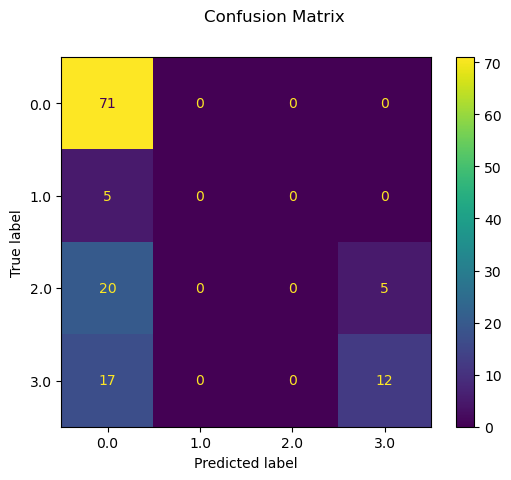

In [62]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_roiall, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [63]:
X_train_comall, X_test_comall, y_train_comall, y_test_comall = train_test_split(
    data_com_allf.values[:,:-1],
    data_com_allf.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=data_com_allf.values[:,-1])

In [64]:
supvm = SVC(C=10, random_state=1)

In [65]:
X_train_comall=np.nan_to_num(X_train_comall)
X_test_comall=np.nan_to_num(X_test_comall)

In [66]:
supvm.fit(X_train_comall, y_train_comall)

SVC(C=10, random_state=1)

In [67]:
predicted = supvm.predict(X_test_comall)

In [68]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_comall, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94        70
         1.0       0.00      0.00      0.00         6
         2.0       1.00      0.08      0.15        25
         3.0       0.52      1.00      0.68        29

    accuracy                           0.75       130
   macro avg       0.61      0.51      0.44       130
weighted avg       0.81      0.75      0.69       130




c:\Users\veroh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\veroh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\veroh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[67  0  0  3]
 [ 5  0  0  1]
 [ 0  0  2 23]
 [ 0  0  0 29]]


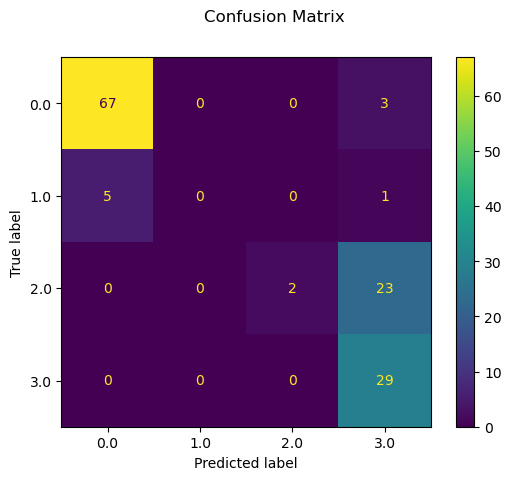

In [69]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_comall, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [101]:
data_ctr_dta['group'].unique()

array([0, 1], dtype=int64)

In [102]:
X_train_ctr_dta, X_test_ctr_dta, y_train_ctr_dta, y_test_ctr_dta = train_test_split(
    data_ctr_dta.values[:,:-1],
    data_ctr_dta.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=data_ctr_dta.values[:,-1])

In [103]:
supvm = SVC(C=10, random_state=1)

In [104]:
X_train_ctr_dta=np.nan_to_num(X_train_ctr_dta)
X_test_ctr_dta=np.nan_to_num(X_test_ctr_dta)

In [105]:
supvm.fit(X_train_ctr_dta, y_train_ctr_dta)

SVC(C=10, random_state=1)

In [106]:
predicted = supvm.predict(X_test_ctr_dta)

In [107]:
print(
    f"Classification report for classifier {supvm}:\n"
    f"{metrics.classification_report(y_test_ctr_dta, predicted)}\n"
)

Classification report for classifier SVC(C=10, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        71
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76




Confusion matrix:
[[71  0]
 [ 0  5]]


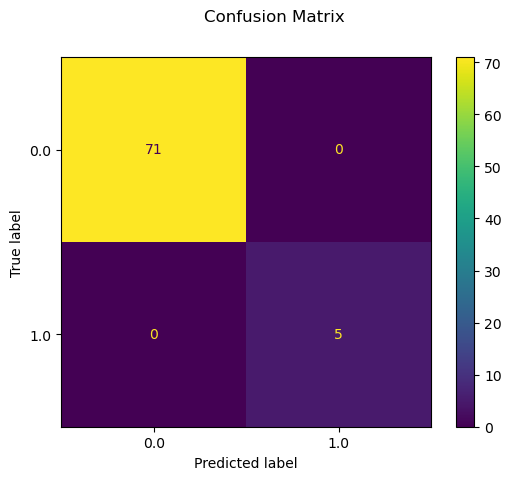

In [108]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_ctr_dta, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

<AxesSubplot:xlabel='power_C14_Theta', ylabel='power_C14_Delta'>

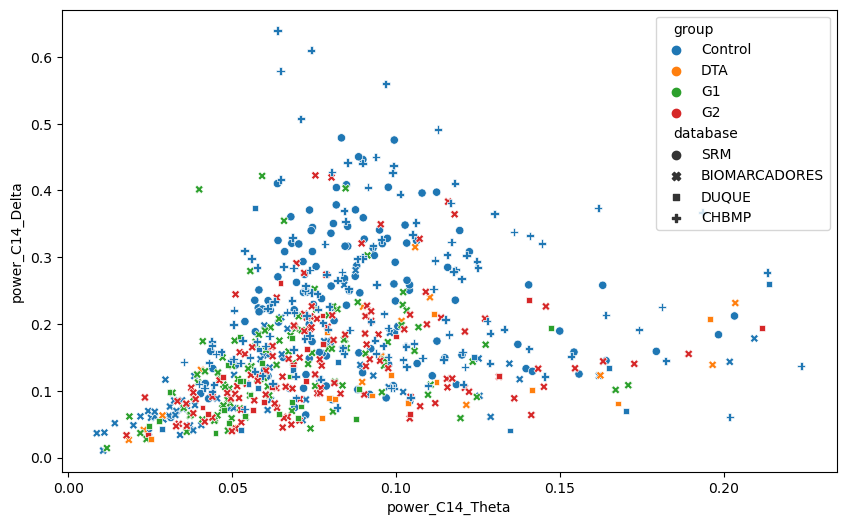

In [70]:
fig = plt.gcf()

fig.set_size_inches(10, 6)
sns.scatterplot(data=data_com,
            y='power_C14_Delta',
            x='power_C14_Theta',
            hue='group',
            style='database',
            )


In [14]:
# Genera los diagramas de dispersión para todas las caracteristicas numericas
# de las ROI'S

""" for i in data_roi_scatter.columns.values[1:]:
    
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    sns.scatterplot(data=data_roi,
                y=i,
                x='index',
                hue='group',
                style='database',
                 )

    plt.show()
 """

" for i in data_roi_scatter.columns.values[1:]:\n    \n    fig = plt.gcf()\n    fig.set_size_inches(10, 6)\n    sns.scatterplot(data=data_roi,\n                y=i,\n                x='index',\n                hue='group',\n                style='database',\n                 )\n\n    plt.show()\n "

In [15]:
# Genera los diagramas de dispersión para todas las caracteristicas numericas
# de las Componentes

""" for i in data_com_scatter.columns.values[1:]:

    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    sns.scatterplot(data=data_com,
                y=i,
                x='index',
                hue='group',
                style='database',
                )

    plt.show() """

" for i in data_com_scatter.columns.values[1:]:\n\n    fig = plt.gcf()\n    fig.set_size_inches(10, 6)\n    sns.scatterplot(data=data_com,\n                y=i,\n                x='index',\n                hue='group',\n                style='database',\n                )\n\n    plt.show() "

In [16]:
power_data_com = data_com.filter(regex='power')
power_data_com['group'] = data_com['group']
power_data_com

C:\Users\santi\AppData\Local\Temp\ipykernel_16312\4184847902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_data_com['group'] = data_com['group']


,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,power_C14_Beta1,power_C14_Beta2,power_C14_Beta3,power_C14_Gamma,power_C15_Delta,power_C15_Theta,...,power_C24_Gamma,power_C25_Delta,power_C25_Theta,power_C25_Alpha-1,power_C25_Alpha-2,power_C25_Beta1,power_C25_Beta2,power_C25_Beta3,power_C25_Gamma,group
0,0.051364,0.014170,0.038517,0.036840,0.128756,0.062628,0.208624,0.459102,0.130821,0.027658,...,0.418538,0.126040,0.021880,0.118854,0.083719,0.098417,0.051798,0.148252,0.351040,Control
1,0.123849,0.050573,0.196801,0.137692,0.190550,0.138484,0.103443,0.058608,0.235891,0.112302,...,0.071550,0.110734,0.067652,0.390049,0.172874,0.137910,0.047295,0.047224,0.026262,Control
2,0.086113,0.061844,0.174856,0.116405,0.174375,0.089877,0.131659,0.164872,0.147927,0.217919,...,0.080303,0.105602,0.082669,0.398443,0.176257,0.112945,0.035869,0.047931,0.040284,Control
3,0.122635,0.093048,0.136205,0.109801,0.248049,0.090080,0.111673,0.088508,0.183832,0.144753,...,0.039477,0.249400,0.120137,0.282350,0.124876,0.107510,0.036775,0.048835,0.030118,Control
4,0.258650,0.084168,0.082835,0.122452,0.170350,0.046309,0.122022,0.113214,0.423568,0.126828,...,0.058886,0.224661,0.109231,0.323537,0.109326,0.092462,0.032679,0.060702,0.047402,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.161812,0.058283,0.206229,0.156271,0.155841,0.064073,0.104432,0.093060,0.369678,0.086467,...,0.056912,0.098426,0.057216,0.413332,0.250311,0.086018,0.021089,0.035282,0.038326,Control
414,0.260105,0.213918,0.136365,0.085489,0.121338,0.033049,0.087660,0.062075,0.312101,0.291520,...,0.045383,0.261595,0.243108,0.192356,0.087458,0.090081,0.022557,0.055112,0.047733,Control
415,0.042663,0.028603,0.056898,0.167310,0.360637,0.121566,0.182497,0.039824,0.103224,0.076324,...,0.022339,0.045884,0.029652,0.083854,0.423660,0.318126,0.032106,0.052135,0.014584,Control
416,0.040451,0.134720,0.500172,0.194519,0.066996,0.025922,0.028799,0.008421,0.068044,0.210064,...,0.022126,0.050768,0.358984,0.431792,0.061551,0.058956,0.011950,0.014391,0.011608,Control


# Entrenamiento random forest

## Random Forest de clasificación multiclase

In [93]:
rfclf = RandomForestClassifier(n_estimators=100,
criterion='gini',
random_state=1,
)

In [94]:
rfclf.fit(X_train_roi, y_train_roi)

RandomForestClassifier(random_state=1)

In [95]:
predicted = rfclf.predict(X_test_roi)

In [96]:
print(
    f"Classification report for classifier {rfclf}:\n"
    f"{metrics.classification_report(y_test_roi, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(random_state=1):
              precision    recall  f1-score   support

         0.0       0.69      0.94      0.80        71
         1.0       1.00      0.60      0.75         5
         2.0       0.60      0.48      0.53        25
         3.0       0.70      0.24      0.36        29

    accuracy                           0.68       130
   macro avg       0.75      0.57      0.61       130
weighted avg       0.69      0.68      0.65       130




Confusion matrix:
[[67  0  4  0]
 [ 2  3  0  0]
 [10  0 12  3]
 [18  0  4  7]]


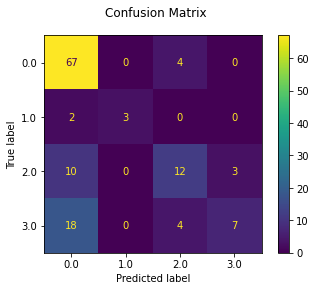

In [97]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_roi, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [98]:
rfclf.fit(X_train_com, y_train_com)

RandomForestClassifier(random_state=1)

In [99]:
predicted = rfclf.predict(X_test_com)

In [100]:
print(
    f"Classification report for classifier {rfclf}:\n"
    f"{metrics.classification_report(y_test_com, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(random_state=1):
              precision    recall  f1-score   support

         0.0       0.66      0.96      0.78        70
         1.0       1.00      0.17      0.29         6
         2.0       0.79      0.44      0.56        25
         3.0       0.71      0.34      0.47        29

    accuracy                           0.68       130
   macro avg       0.79      0.48      0.52       130
weighted avg       0.71      0.68      0.65       130




Confusion matrix:
[[67  0  2  1]
 [ 5  1  0  0]
 [11  0 11  3]
 [18  0  1 10]]


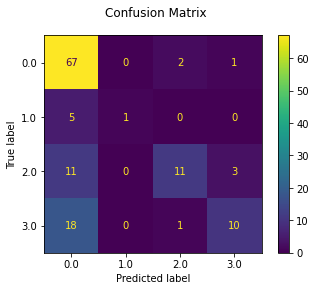

In [101]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_com, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Random Forest de clasificación binaria

### Controles Vs. DTA

In [102]:
rfclf.fit(X_train_roi_ctr_dta, y_train_roi_ctr_dta)

RandomForestClassifier(random_state=1)

In [103]:
predicted = rfclf.predict(X_test_roi_ctr_dta)

In [104]:
print(
    f"Classification report for classifier {rfclf}:\n"
    f"{metrics.classification_report(y_test_roi_ctr_dta, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(random_state=1):
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        71
         1.0       1.00      0.60      0.75         5

    accuracy                           0.97        76
   macro avg       0.99      0.80      0.87        76
weighted avg       0.97      0.97      0.97        76




Confusion matrix:
[[71  0]
 [ 2  3]]


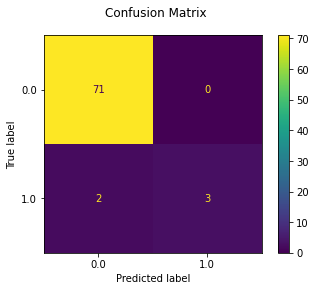

In [105]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_roi_ctr_dta, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [106]:
rfclf.fit(X_train_com_ctr_dta, y_train_com_ctr_dta)

RandomForestClassifier(random_state=1)

In [107]:
predicted = rfclf.predict(X_test_com_ctr_dta)

In [108]:
print(
    f"Classification report for classifier {rfclf}:\n"
    f"{metrics.classification_report(y_test_com_ctr_dta, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(random_state=1):
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        70
         1.0       1.00      0.17      0.29         6

    accuracy                           0.93        76
   macro avg       0.97      0.58      0.63        76
weighted avg       0.94      0.93      0.91        76




Confusion matrix:
[[70  0]
 [ 5  1]]


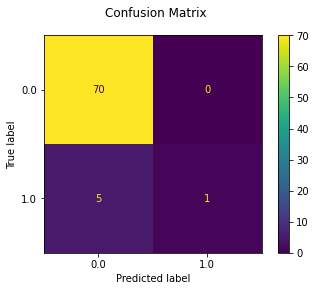

In [109]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_com_ctr_dta, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### G1 Vs. G2

In [110]:
rfclf.fit(X_train_roi_g1_g2, y_train_roi_g1_g2)

RandomForestClassifier(random_state=1)

In [111]:
predicted = rfclf.predict(X_test_roi_g1_g2)

In [112]:
print(
    f"Classification report for classifier {rfclf}:\n"
    f"{metrics.classification_report(y_test_roi_g1_g2, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(random_state=1):
              precision    recall  f1-score   support

         2.0       0.60      0.72      0.65        25
         3.0       0.71      0.59      0.64        29

    accuracy                           0.65        54
   macro avg       0.65      0.65      0.65        54
weighted avg       0.66      0.65      0.65        54




Confusion matrix:
[[18  7]
 [12 17]]


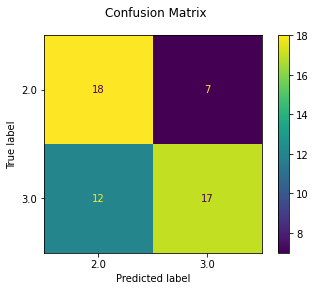

In [113]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_roi_g1_g2, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [114]:
rfclf.fit(X_train_com_g1_g2, y_train_com_g1_g2)

RandomForestClassifier(random_state=1)

In [115]:
predicted = rfclf.predict(X_test_com_g1_g2)

In [116]:
print(
    f"Classification report for classifier {rfclf}:\n"
    f"{metrics.classification_report(y_test_com_g1_g2, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(random_state=1):
              precision    recall  f1-score   support

         2.0       0.75      0.84      0.79        25
         3.0       0.85      0.76      0.80        29

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54




Confusion matrix:
[[21  4]
 [ 7 22]]


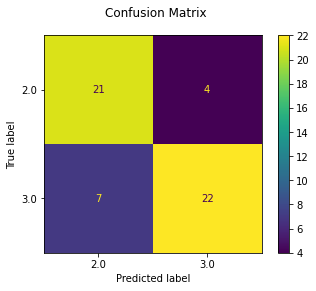

In [117]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_com_g1_g2, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [47]:
ruta_2 = pd.read_feather(r'{path}\Datosparaorganizardataframes\Data_complete_roi_neuroHarmonize_All(SRM_CHBMP_G1_G2).feather'.format(path=path_santiago))


In [48]:
ruta_2

,power_F_Delta,power_C_Delta,power_PO_Delta,power_T_Delta,power_F_Theta,power_C_Theta,power_PO_Theta,power_T_Theta,power_F_Alpha-1,power_C_Alpha-1,...,age,MM_total,FAS_F,FAS_S,FAS_A,education,power_F_Gamma,power_C_Gamma,power_T_Gamma,power_PO_Gamma
0,0.187824,0.173931,0.099571,0.216277,0.066999,0.068393,0.056316,0.085239,0.268937,0.277731,...,29.0,NaN,45.0,44.0,15.0,NaN,0.043024,0.029159,0.047924,0.019791
1,0.370437,0.285240,0.276175,0.137945,0.110551,0.105578,0.093587,0.062795,0.110405,0.111733,...,52.0,NaN,68.0,69.0,24.0,NaN,0.070820,0.086838,0.195894,0.085273
2,0.083051,0.101238,0.080818,0.090121,0.240413,0.246473,0.246351,0.266995,0.373964,0.345826,...,65.0,NaN,45.0,50.0,14.0,NaN,0.036083,0.029621,0.063974,0.020083
3,0.214193,0.256490,0.166917,0.188235,0.102551,0.105999,0.103707,0.091338,0.179522,0.228037,...,29.0,NaN,53.0,59.0,18.0,NaN,0.125614,0.059410,0.115626,0.055935
4,0.162835,0.122925,0.089971,0.131262,0.090665,0.113560,0.058144,0.087892,0.142913,0.181716,...,19.0,NaN,62.0,49.0,16.0,NaN,0.033648,0.027287,0.053471,0.019879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.350561,0.298527,0.289438,0.347641,0.075214,0.084673,0.086836,0.096835,0.085472,0.096114,...,31.0,30.0,NaN,NaN,NaN,12.0,0.102947,0.103699,0.045404,0.138452
336,0.241773,0.198026,0.120970,0.220059,0.096877,0.077458,0.061517,0.089398,0.367754,0.496979,...,35.0,25.0,NaN,NaN,NaN,11.0,0.007993,-0.049565,-0.036753,-0.040046
337,0.106293,0.095339,0.066064,0.139315,0.099904,0.091913,0.083959,0.109608,0.531041,0.459021,...,46.0,30.0,NaN,NaN,NaN,11.0,-0.105515,-0.078080,-0.051478,-0.045866
338,0.213763,0.229453,0.188597,0.148673,0.324271,0.290470,0.337067,0.301021,0.302598,0.307341,...,31.0,30.0,NaN,NaN,NaN,12.0,0.016553,-0.011713,0.050424,0.001717


In [49]:
ruta_2.shape

(340, 396)

In [50]:
for group in ruta_2['group'].unique():
        print('{} : {}'.format(group, (ruta_2['group']==group).sum()))

Control : 292
G1 : 48


In [51]:
ruta_2.groupby(['group']).describe()

power_F_Delta                                                    \
                count      mean       std       min       25%       50%   
group                                                                     
Control         292.0  0.220701  0.094278  0.070840  0.147394  0.206789   
G1               48.0  0.237466  0.089917  0.073865  0.162139  0.237115   

                            power_C_Delta            ... power_T_Gamma  \
              75%       max         count      mean  ...           75%   
group                                                ...                 
Control  0.274189  0.503673         292.0  0.188544  ...      0.092004   
G1       0.290031  0.459722          48.0  0.192895  ...      0.050896   

                  power_PO_Gamma                                          \
              max          count      mean       std       min       25%   
group                                                                      
Control  0.494274          292.0  0.036818  0.043105 -0.059556  0.015252   
G1       0.080039           48.0  0.016901  0.006306  0.009542  0.012200   

                                       
              50%       75%       max  
group                                  
Control  0.024938  0.045871  0.286627  
G1       0.014795  0.020045  0.038342  

[2 rows x 3128 columns]

<AxesSubplot:title={'center':'power_C_Delta'}, xlabel='group'>

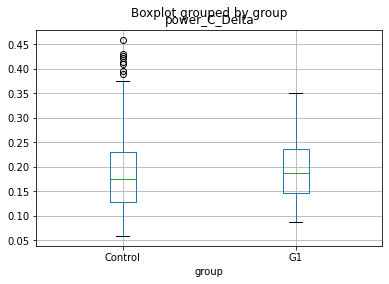

In [52]:
ruta_2.boxplot('power_C_Delta',by='group')

In [53]:
for column in ruta_2.columns:
        print('{} : {}'.format(column, (ruta_2[column].isna().sum())))
        if ruta_2[column].isna().sum() != 0:
                ruta_2.drop(column, axis=1, inplace=True)
                print('columna eliminada por de valores faltantes')

power_F_Delta : 0
power_C_Delta : 0
power_PO_Delta : 0
power_T_Delta : 0
power_F_Theta : 0
power_C_Theta : 0
power_PO_Theta : 0
power_T_Theta : 0
power_F_Alpha-1 : 0
power_C_Alpha-1 : 0
power_PO_Alpha-1 : 0
power_T_Alpha-1 : 0
power_F_Alpha-2 : 0
power_C_Alpha-2 : 0
power_PO_Alpha-2 : 0
power_T_Alpha-2 : 0
power_F_Beta1 : 0
power_C_Beta1 : 0
power_PO_Beta1 : 0
power_T_Beta1 : 0
power_F_Beta2 : 0
power_C_Beta2 : 0
power_PO_Beta2 : 0
power_T_Beta2 : 0
power_F_Beta3 : 0
power_C_Beta3 : 0
power_PO_Beta3 : 0
power_T_Beta3 : 0
sl_F_Delta : 0
sl_C_Delta : 0
sl_PO_Delta : 0
sl_T_Delta : 0
sl_F_Theta : 0
sl_C_Theta : 0
sl_PO_Theta : 0
sl_T_Theta : 0
sl_F_Alpha-1 : 0
sl_C_Alpha-1 : 0
sl_PO_Alpha-1 : 0
sl_T_Alpha-1 : 0
sl_F_Alpha-2 : 0
sl_C_Alpha-2 : 0
sl_PO_Alpha-2 : 0
sl_T_Alpha-2 : 0
sl_F_Beta1 : 0
sl_C_Beta1 : 0
sl_PO_Beta1 : 0
sl_T_Beta1 : 0
sl_F_Beta2 : 0
sl_C_Beta2 : 0
sl_PO_Beta2 : 0
sl_T_Beta2 : 0
sl_F_Beta3 : 0
sl_C_Beta3 : 0
sl_PO_Beta3 : 0
sl_T_Beta3 : 0
sl_F_Gamma : 0
sl_C_Gamma : 0


In [54]:
ruta_2.shape

(340, 391)

In [55]:
clases_mapeadas = {label:idx for idx,label in enumerate(np.unique(ruta_2['group']))}
ruta_2.loc[:,'group'] = ruta_2.loc[:,'group'].map(clases_mapeadas) 
print(clases_mapeadas)

{'Control': 0, 'G1': 1}


In [56]:
for column in ruta_2.columns:
        print('{} : {}'.format(column, (ruta_2[column].dtypes)))

power_F_Delta : float64
power_C_Delta : float64
power_PO_Delta : float64
power_T_Delta : float64
power_F_Theta : float64
power_C_Theta : float64
power_PO_Theta : float64
power_T_Theta : float64
power_F_Alpha-1 : float64
power_C_Alpha-1 : float64
power_PO_Alpha-1 : float64
power_T_Alpha-1 : float64
power_F_Alpha-2 : float64
power_C_Alpha-2 : float64
power_PO_Alpha-2 : float64
power_T_Alpha-2 : float64
power_F_Beta1 : float64
power_C_Beta1 : float64
power_PO_Beta1 : float64
power_T_Beta1 : float64
power_F_Beta2 : float64
power_C_Beta2 : float64
power_PO_Beta2 : float64
power_T_Beta2 : float64
power_F_Beta3 : float64
power_C_Beta3 : float64
power_PO_Beta3 : float64
power_T_Beta3 : float64
sl_F_Delta : float64
sl_C_Delta : float64
sl_PO_Delta : float64
sl_T_Delta : float64
sl_F_Theta : float64
sl_C_Theta : float64
sl_PO_Theta : float64
sl_T_Theta : float64
sl_F_Alpha-1 : float64
sl_C_Alpha-1 : float64
sl_PO_Alpha-1 : float64
sl_T_Alpha-1 : float64
sl_F_Alpha-2 : float64
sl_C_Alpha-2 : floa

In [70]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

ruta_2_todas = ruta_2.select_dtypes(include=numerics)

In [71]:
ruta_2_todas.shape

(340, 387)

In [72]:
col = ruta_2_todas.pop('group')
ruta_2_todas

,power_F_Delta,power_C_Delta,power_PO_Delta,power_T_Delta,power_F_Theta,power_C_Theta,power_PO_Theta,power_T_Theta,power_F_Alpha-1,power_C_Alpha-1,...,crossfreq_T_Mbeta1_Gamma,crossfreq_T_Mbeta2_Gamma,crossfreq_T_Mbeta3_Gamma,crossfreq_T_Mgamma_Gamma,sex,age,power_F_Gamma,power_C_Gamma,power_T_Gamma,power_PO_Gamma
0,0.187824,0.173931,0.099571,0.216277,0.066999,0.068393,0.056316,0.085239,0.268937,0.277731,...,0.296545,0.075335,0.102914,0.082863,0.0,29.0,0.043024,0.029159,0.047924,0.019791
1,0.370437,0.285240,0.276175,0.137945,0.110551,0.105578,0.093587,0.062795,0.110405,0.111733,...,0.277830,0.073061,0.135077,0.190104,0.0,52.0,0.070820,0.086838,0.195894,0.085273
2,0.083051,0.101238,0.080818,0.090121,0.240413,0.246473,0.246351,0.266995,0.373964,0.345826,...,0.381262,0.100455,0.141764,0.106671,1.0,65.0,0.036083,0.029621,0.063974,0.020083
3,0.214193,0.256490,0.166917,0.188235,0.102551,0.105999,0.103707,0.091338,0.179522,0.228037,...,0.253388,0.060112,0.130725,0.177915,0.0,29.0,0.125614,0.059410,0.115626,0.055935
4,0.162835,0.122925,0.089971,0.131262,0.090665,0.113560,0.058144,0.087892,0.142913,0.181716,...,0.555819,0.127409,0.221343,0.202014,0.0,19.0,0.033648,0.027287,0.053471,0.019879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.350561,0.298527,0.289438,0.347641,0.075214,0.084673,0.086836,0.096835,0.085472,0.096114,...,0.153845,0.043721,0.068291,0.050188,1.0,31.0,0.102947,0.103699,0.045404,0.138452
336,0.241773,0.198026,0.120970,0.220059,0.096877,0.077458,0.061517,0.089398,0.367754,0.496979,...,0.257805,0.068564,0.104854,0.089596,1.0,35.0,0.007993,-0.049565,-0.036753,-0.040046
337,0.106293,0.095339,0.066064,0.139315,0.099904,0.091913,0.083959,0.109608,0.531041,0.459021,...,0.467485,0.110700,0.125587,0.079576,0.0,46.0,-0.105515,-0.078080,-0.051478,-0.045866
338,0.213763,0.229453,0.188597,0.148673,0.324271,0.290470,0.337067,0.301021,0.302598,0.307341,...,0.262813,0.078999,0.108530,0.090999,0.0,31.0,0.016553,-0.011713,0.050424,0.001717


In [73]:
ruta_2_todas.insert(len(ruta_2_todas.columns), col.name, col)

In [74]:
nombres_columnas = ruta_2_todas.columns[:-1]
nombres_columnas

Index(['power_F_Delta', 'power_C_Delta', 'power_PO_Delta', 'power_T_Delta',
       'power_F_Theta', 'power_C_Theta', 'power_PO_Theta', 'power_T_Theta',
       'power_F_Alpha-1', 'power_C_Alpha-1',
       ...
       'crossfreq_T_Mbeta1_Gamma', 'crossfreq_T_Mbeta2_Gamma',
       'crossfreq_T_Mbeta3_Gamma', 'crossfreq_T_Mgamma_Gamma', 'sex', 'age',
       'power_F_Gamma', 'power_C_Gamma', 'power_T_Gamma', 'power_PO_Gamma'],
      dtype='object', length=386)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    ruta_2_todas.values[:,:-1],
    ruta_2_todas.values[:,-1],
    test_size=0.2,
    random_state=1,
    stratify=ruta_2_todas.values[:,-1])

In [77]:
forestclf = RandomForestClassifier(n_estimators=500,
    random_state=1)

 1) entropy_F_Beta2                0.014907
 2) entropy_C_Beta2                0.013610
 3) entropy_F_Gamma                0.013465
 4) entropy_T_Theta                0.012294
 5) entropy_PO_Theta               0.011699
 6) entropy_C_Gamma                0.010776
 7) entropy_T_Alpha-2              0.010210
 8) entropy_PO_Alpha-1             0.010007
 9) entropy_PO_Gamma               0.009834
10) entropy_C_Alpha-1              0.009613
11) entropy_F_Alpha-2              0.009353
12) entropy_F_Alpha-1              0.009353
13) entropy_T_Alpha-1              0.008566
14) cohfreq_F_Gamma                0.008526
15) entropy_T_Beta2                0.008494
16) entropy_PO_Beta2               0.008420
17) entropy_T_Gamma                0.007947
18) entropy_C_Delta                0.007913
19) entropy_F_Beta1                0.007725
20) cohfreq_PO_Gamma               0.007682
21) entropy_C_Theta                0.007534
22) entropy_C_Beta1                0.007351
23) entropy_F_Beta3             

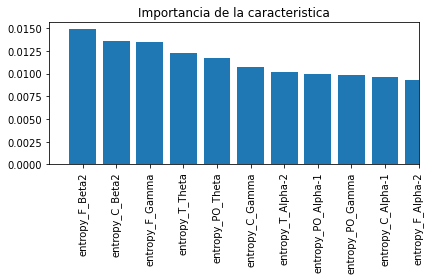

In [79]:
forestclf.fit(X_train, y_train)
features_scores = forestclf.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]


for f in range(X_train.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))

plt.title('Importancia de la caracteristica')

plt.bar(range(X_train.shape[1]),
    features_scores[index],
    align='center')

plt.xticks(range(X_train.shape[1]),
    nombres_columnas[index],
    rotation=90)

plt.xlim([-1, 10])

plt.tight_layout()

plt.show()